#  Projeto 1

# - Import de dados:

In [66]:
# Import

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


# - Lendo arquivos xlsx:

In [67]:
idh = pd.read_excel('hdi_human_development_index.xlsx')
exercito = pd.read_excel('indicator army_total.xlsx')
carvao = pd.read_excel('Coal Consumption.xlsx')

# - Separando dados de 2008

In [68]:
idh_2008 = idh.loc[:,['geo', 2008]]
idh_idx = idh_2008.set_index('geo')

In [69]:
exercito_2008 = exercito.loc[:,['Paises', 2008]]
exercito_idx = exercito_2008.set_index('Paises')

In [70]:
carvao_2008 = carvao.loc[:,['Paises', 2008]]
carvao_idx = carvao_2008.set_index('Paises')

# - Junção dos dados:

In [71]:
jun1 = idh_idx.join(exercito_idx, how='inner', lsuffix=' IDH', rsuffix=' Quantidade de Soldados')
jun2 = jun1.dropna()

In [72]:
jun2["Consumo de carvao em Ton's equivalentes de petróleo"] = carvao_idx[2008]
data = jun2.dropna()
data.head(10)

C:\ProgramData\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,2008 IDH,2008 Quantidade de Soldados,Consumo de carvao em Ton's equivalentes de petróleo
Algeria,0.705,334000.0,5.780000e+05
Argentina,0.794,107000.0,1.137000e+06
Australia,0.925,55000.0,5.461050e+07
Austria,0.870,35000.0,2.803000e+06
Azerbaijan,0.728,82000.0,3.000000e+04
Bangladesh,0.523,221000.0,6.280000e+05
Belarus,0.771,183000.0,3.000000e+04
Brazil,0.714,721000.0,1.348300e+07
Bulgaria,0.768,75000.0,7.512000e+06
Canada,0.898,64000.0,2.989644e+07


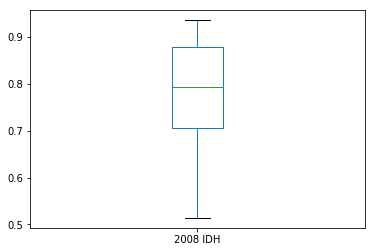

In [88]:
data["2008 IDH"].plot.box()

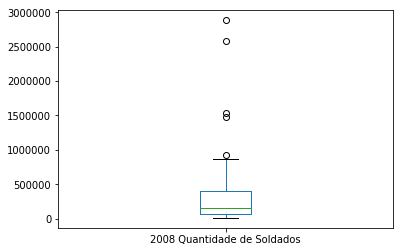

In [89]:
data["2008 Quantidade de Soldados"].plot.box()

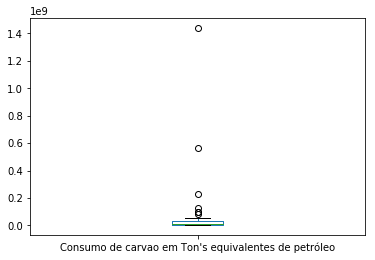

In [93]:
data["Consumo de carvao em Ton's equivalentes de petróleo"].plot.box()

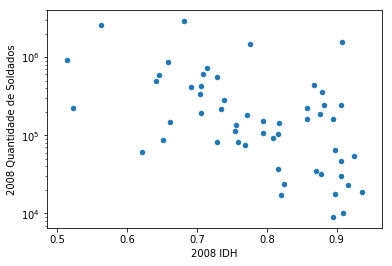

In [80]:
data.plot.scatter(x="2008 IDH", y = "2008 Quantidade de Soldados", logy = True)

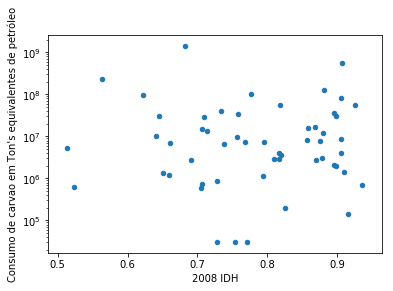

In [81]:
data.plot.scatter(x="2008 IDH", y = "Consumo de carvao em Ton's equivalentes de petróleo",logy = True)

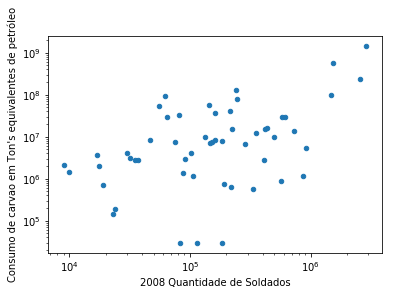

In [82]:
data.plot.scatter(x="2008 Quantidade de Soldados", y = "Consumo de carvao em Ton's equivalentes de petróleo",logy = True, logx = True)

In [83]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

Ajuste linear entre X3 e X4:
Coeficiente linear: 2003420.975850705
Coeficiente angular: -2103055.6719341706


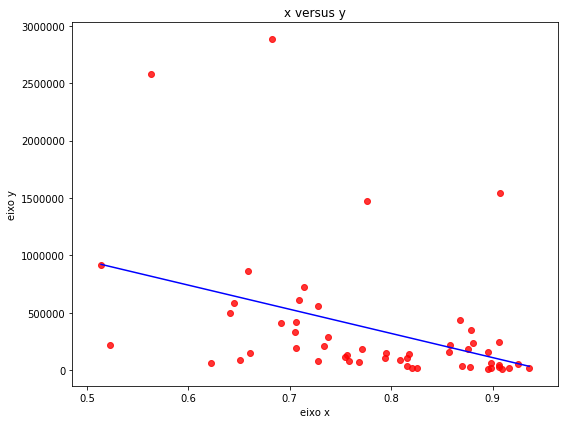

In [84]:
reta(data['2008 IDH'], data['2008 Quantidade de Soldados'])

Ajuste linear entre X3 e X4:
Coeficiente linear: 196229407.54084677
Coeficiente angular: -176464676.36949655


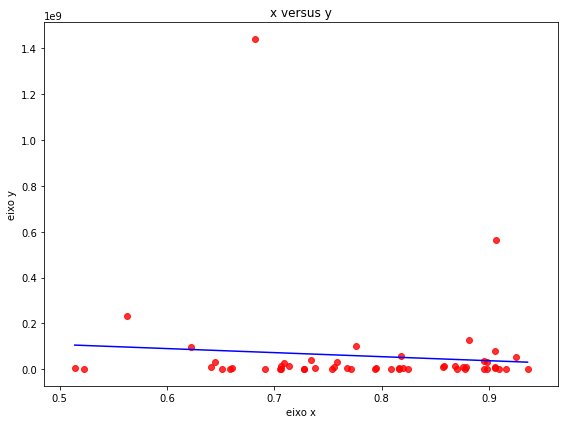

In [85]:
reta(data['2008 IDH'], data["Consumo de carvao em Ton's equivalentes de petróleo"])

Ajuste linear entre X3 e X4:
Coeficiente linear: -40560472.29111065
Coeficiente angular: 275.9899887905899


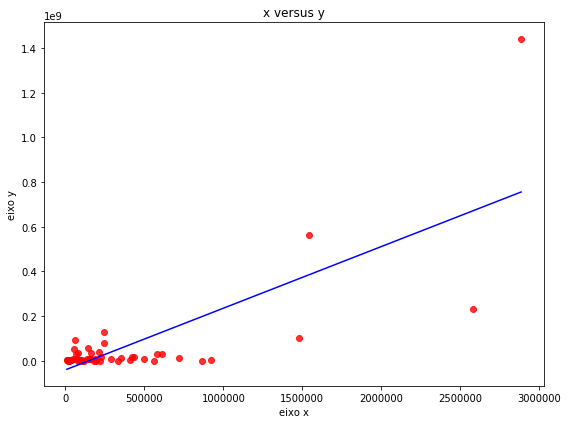

In [86]:
reta(data['2008 Quantidade de Soldados'], data["Consumo de carvao em Ton's equivalentes de petróleo"])